In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

In [2]:
RANDOM_SEED = 42

In [3]:
df = pd.read_pickle('../data/processed/2_train.pkl')

In [4]:
df

,id,class,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,...,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,season_a,season_s,season_u
0,0,False,8.80,4.51,15.39,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,1,True,4.51,4.79,6.48,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2,False,6.94,6.85,9.93,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,3,False,3.88,4.16,6.53,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
4,4,False,5.85,3.37,8.36,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,False,9.29,12.14,18.81,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3116941,3116941,False,10.88,6.65,26.97,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3116942,3116942,True,7.82,9.51,11.06,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3116943,3116943,False,9.45,9.13,17.77,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True


In [5]:
X = df.drop(columns=['class', 'id'])
y = df['class']

In [6]:
X

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-surface_d,...,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,season_a,season_s,season_u
0,8.80,4.51,15.39,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,4.51,4.79,6.48,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,6.94,6.85,9.93,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,3.88,4.16,6.53,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,5.85,3.37,8.36,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,9.29,12.14,18.81,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3116941,10.88,6.65,26.97,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
3116942,7.82,9.51,11.06,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3116943,9.45,9.13,17.77,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True


In [7]:
y

0          False
1           True
2          False
3          False
4          False
           ...  
3116940    False
3116941    False
3116942     True
3116943    False
3116944     True
Name: class, Length: 3113198, dtype: bool

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2490558, 78), (622640, 78), (2490558,), (622640,))

In [11]:
%%time

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)

rf_classifier.fit(X_train, y_train)

CPU times: user 4min 27s, sys: 2.22 s, total: 4min 29s
Wall time: 4min 35s


RandomForestClassifier(random_state=42)

In [13]:
%%time

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

train_acc = accuracy_score(y_true=y_train, y_pred=y_train_pred)
test_acc = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print(f'Train Acc: {train_acc*100:.2f}% | Test Acc: {test_acc*100:.2f}%')

Train Acc: 100.00% | Test Acc: 98.90%
CPU times: user 57.7 s, sys: 716 ms, total: 58.4 s
Wall time: 59.6 s


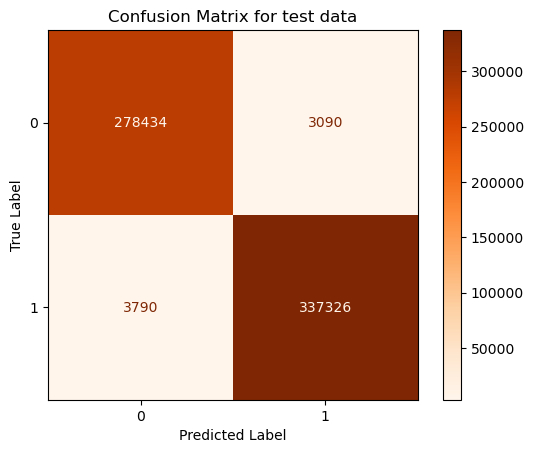

In [18]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

display.plot(cmap=plt.cm.Oranges)

plt.title('Confusion Matrix for test data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [19]:
joblib.dump(rf_classifier, '../models/rf_classifier_model.pkl')

['../models/rf_classifier_model.pkl']